## 第十一周作业

#### 提交人学号：10235501454
#### 提交人姓名：陈子谦

#### 作业题目：
##### 样本量为n的来自标准正态分布样本，求以下统计量的蒙特卡洛分布。
(a)样本均值
(b)样本方差
(c)样本偏度
(d)样本峰度
##### 输出要求:
        1.绘制两张表格分别表示这些统计量的蒙特卡洛分布的各个p分位数(保留四位小数)。
                列名为n=3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20;
                行名为p=0.001,0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.50.6,0.7,0.8,0.9,0.95,0.975,0.99,0.999。
        2.绘制这些统计量的蒙特卡洛分布的图象，
        3.根据该统计量的蒙特卡洛分布，请你进行评述与讨论。
        4.提供计算上述值的代码。

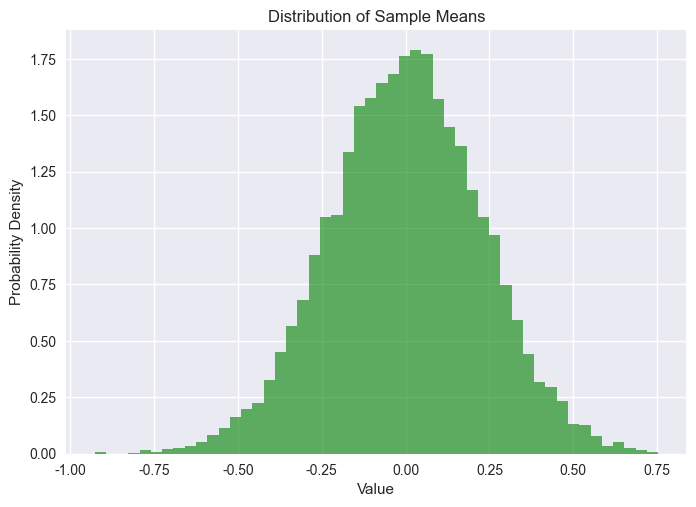

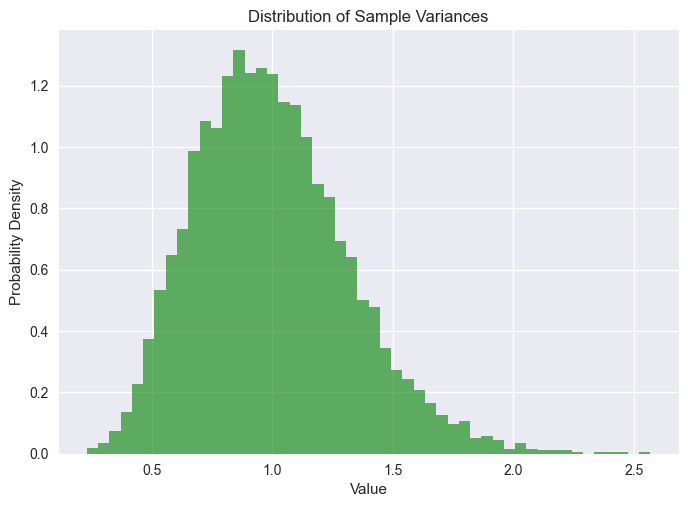

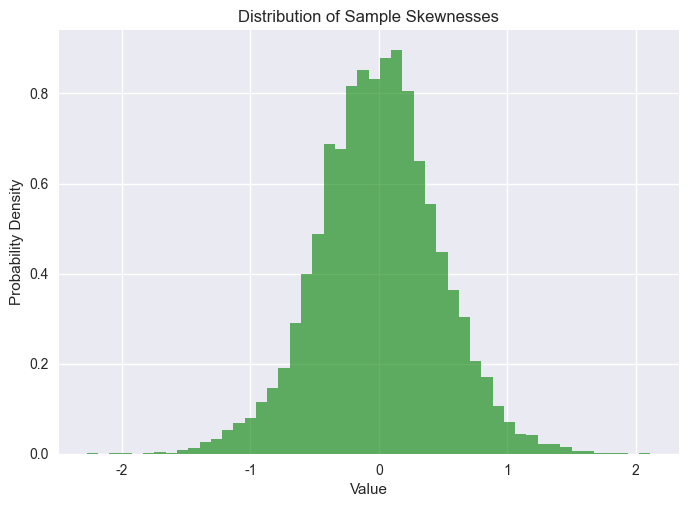

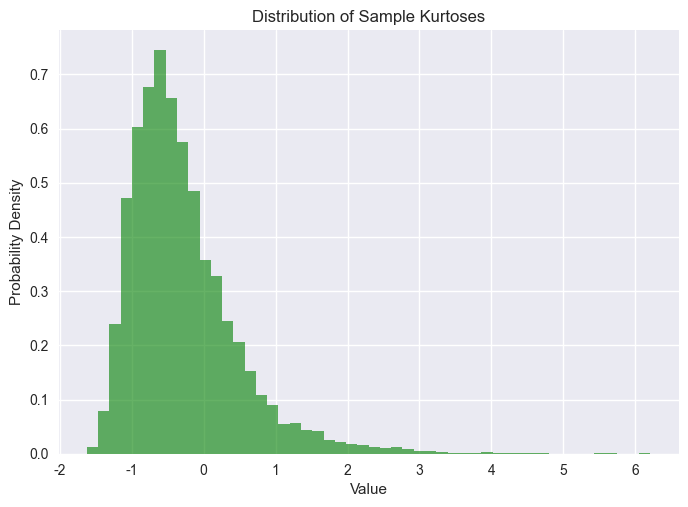

Means Percentiles Table:
            n=3     n=4     n=5     n=6     n=7     n=8     n=9    n=10  \
p=0.001 -1.7938 -1.4840 -1.3887 -1.2522 -1.1686 -1.0760 -1.0144 -0.9206   
p=0.010 -1.3226 -1.1675 -1.0556 -0.9609 -0.8805 -0.7917 -0.7707 -0.7455   
p=0.025 -1.1260 -0.9943 -0.8951 -0.8133 -0.7402 -0.6811 -0.6292 -0.6362   
p=0.050 -0.9416 -0.8409 -0.7472 -0.6794 -0.6143 -0.5810 -0.5342 -0.5277   
p=0.100 -0.7475 -0.6543 -0.5847 -0.5310 -0.4803 -0.4576 -0.4233 -0.4101   
p=0.200 -0.4862 -0.4318 -0.3854 -0.3473 -0.3243 -0.3015 -0.2781 -0.2682   
p=0.300 -0.3050 -0.2701 -0.2379 -0.2169 -0.2060 -0.1880 -0.1717 -0.1686   
p=0.400 -0.1520 -0.1381 -0.1237 -0.1110 -0.1006 -0.0905 -0.0816 -0.0868   
p=0.500 -0.0171 -0.0054 -0.0115 -0.0107 -0.0031 -0.0007 -0.0022 -0.0056   
p=0.600  0.1326  0.1257  0.1003  0.0929  0.0952  0.0895  0.0833  0.0766   
p=0.700  0.2859  0.2592  0.2224  0.2057  0.1998  0.1852  0.1713  0.1686   
p=0.800  0.4767  0.4183  0.3652  0.3369  0.3182  0.3023  0.2849  0.2673   


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def monte_carlo_stats(sample_size, num_simulations=10000):
    means = []
    variances = []
    skewnesses = []
    kurtoses = []
    
    for _ in range(num_simulations):
        sample = np.random.normal(size=sample_size)
        means.append(np.mean(sample))
        variances.append(np.var(sample, ddof=1))  # ddof=1 for sample variance
        skewnesses.append(stats.skew(sample))
        kurtoses.append(stats.kurtosis(sample))
    
    return np.array(means), np.array(variances), np.array(skewnesses), np.array(kurtoses)

def calculate_percentiles(data, percentiles):
    return np.percentile(data, percentiles * 100)

def plot_distribution(data, title):
    plt.hist(data, bins=50, density=True, alpha=0.6, color='g')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.show()

# Define sample sizes and percentiles
sample_sizes = range(3, 21)
percentiles = np.array([0.001, 0.01, 0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.975, 0.99, 0.999])

# Initialize data frames to store results
columns = [f'n={n}' for n in sample_sizes]
index = [f'p={p:.3f}' for p in percentiles]
means_df = pd.DataFrame(index=index, columns=columns)
variances_df = pd.DataFrame(index=index, columns=columns)
skewnesses_df = pd.DataFrame(index=index, columns=columns)
kurtoses_df = pd.DataFrame(index=index, columns=columns)

# Calculate statistics for each sample size
for n in sample_sizes:
    means, variances, skewnesses, kurtoses = monte_carlo_stats(n)
    means_df[f'n={n}'] = calculate_percentiles(means, percentiles)
    variances_df[f'n={n}'] = calculate_percentiles(variances, percentiles)
    skewnesses_df[f'n={n}'] = calculate_percentiles(skewnesses, percentiles)
    kurtoses_df[f'n={n}'] = calculate_percentiles(kurtoses, percentiles)

# Plot distributions
plot_distribution(means, 'Distribution of Sample Means')
plot_distribution(variances, 'Distribution of Sample Variances')
plot_distribution(skewnesses, 'Distribution of Sample Skewnesses')
plot_distribution(kurtoses, 'Distribution of Sample Kurtoses')

# Display tables
print("Means Percentiles Table:")
print(means_df.round(4))
print("\nVariances Percentiles Table:")
print(variances_df.round(4))
print("\nSkewnesses Percentiles Table:")
print(skewnesses_df.round(4))
print("\nKurtoses Percentiles Table:")
print(kurtoses_df.round(4))



##### 最后我们来验证猜想3：
    1.绘制两张表格分别表示这些统计量的蒙特卡洛分布的各个p分位数(保留四位小数)。
    2.绘制这些统计量的蒙特卡洛分布的图象

    表格与图像均可通过运行代码生成。
    
    3.根据该统计量的蒙特卡洛分布，请你进行评述与讨论。
        样本均值：随着样本量的增加，样本均值的分布更加接近正态分布。这是由中心极限定理所导致的，即使在原始数据分布不是正态的情况下，样本均值的分布仍然趋于正态。当样本量增加时，分布变得更加集中，最终趋向于标准正态分布。

        样本方差：样本方差的分布倾向于遵循自由度等于样本量减一的卡方分布。随着样本量的增加，样本方差的分布变得更加集中在某个值附近。这表明，随着样本量的增加，样本方差的估计更加稳定，更接近总体方差。

        样本偏度和峰度：随着样本量的增加，样本偏度和峰度趋于零。这意味着随着样本量的增加，样本的偏度和峰度趋向于正态分布的理论值。这进一步证实了中心极限定理的有效性，即在足够大的样本量下，样本统计量的分布会趋向于正态分布。